In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
import wtools

# Making Gridded/Mesh Data

## A simple case
First, create a dictionary of your model data. For this example, we create a uniformly discretized 3D volume of data. The first array is some random data `nx` by `ny` by `nz` (10 by 10 by 10 for the snippet below) and the second array include some spatial data ranging from 0 to 1000 which we restructure in a contiguous fashion (x then y then z) which we can use for reference when checking how our data is displayed.

In [3]:
models = {
          'rand': np.random.randn(10,10,10),
          'spatial': np.linspace(0, 1000, 1000).reshape((10,10,10)),
         }

Once you have your model dictionary created, create a `Grid` object and feed it your models like below. Note that we print this object to ensure it was constructed properly and if not, fill out the parts that are missing. On the backend, this print/output of the object calls `grid.validate()` which ensures the grid is ready for use!

In [4]:
grid = wtools.Grid(models=models)
grid

<Grid instance at 4556654072>
  Shape: (10, 10, 10)
  Origin: (0.0, 0.0, 0.0)
  X Bounds: (0.0, 10.0)
  Y Bounds: (0.0, 10.0)
  Z Bounds: (0.0, 10.0)
  Models: (2)
    'rand' (float64): (-3.123e+00, 3.502e+00)
    'spatial' (float64): (0.000e+00, 1.000e+03)

Now let's use this new `Grid` object. Please reference `Grid`'s code docs on https://wtools.readthedocs.io/en/latest/ to understand what attributes and methods are present.

In [5]:
grid.keys

['rand', 'spatial']

In [6]:
grid.origin

Vector3([ 0.,  0.,  0.])

In [7]:
grid.xtensor

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [8]:
grid.xcenters

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

In [9]:
grid.saveUBC('output/simple-grid')

0.5 9.5


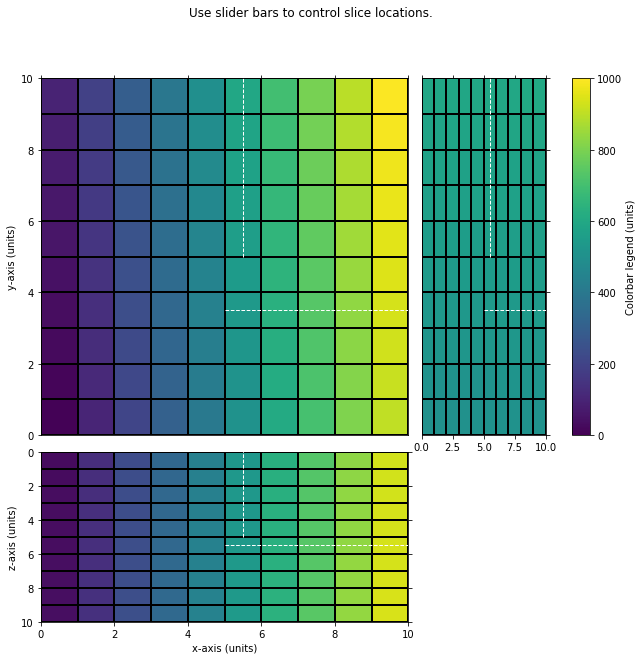

In [10]:
plt.figure(figsize=(10, 10))
wtools.OrthographicSlicer(plt, grid, 'spatial', yslice=3.5)

## Spatially Referenced Grids

Now, what if you know the spatial reference of your grid? Then go ahead and pass the origin and cell spacings to the `Grid` object upon intialization. For this example, we will recreate some volumetric data and build a spatial reference frame.

In [11]:
nx, ny, nz = 12, 20, 15
models = {
          'rand': np.random.randn(nx,ny,nz),
          'spatial': np.linspace(0, nx*ny*nz, nx*ny*nz).reshape((nx,ny,nz)),
         }

Now lets build the cell spacings along each axis for our gridded data. It is very important to note that the cell sizes do NOT have to be uniformly spaced.

In [12]:
origin = (100.0, 350.0, -1000.0)
xs = np.array([100, 50] + [10]*(nx-4) + [50, 100])
ys = np.array([100, 50] + [10]*(ny-4) + [50, 100])
zs = np.array([10]*(nz-6) + [25, 50, 75, 100, 150, 200])

In [13]:
grid = wtools.Grid(models=models, 
                          origin=origin,
                          xtensor=xs,
                          ytensor=ys,
                          ztensor=zs,)
grid

<Grid instance at 4649516784>
  Shape: (12, 20, 15)
  Origin: (100.0, 350.0, -1000.0)
  X Bounds: (100.0, 480.0)
  Y Bounds: (350.0, 810.0)
  Z Bounds: (-1000.0, -310.0)
  Models: (2)
    'rand' (float64): (-3.515e+00, 3.563e+00)
    'spatial' (float64): (0.000e+00, 3.600e+03)

Now lets display this meshed data with a plotting resolution that represents the model discretization.

150.0 430.0


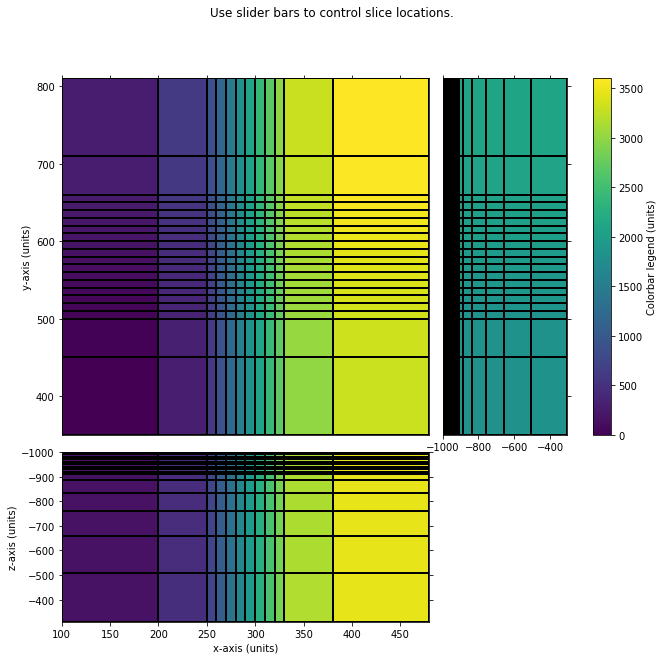

In [14]:
plt.figure(figsize=(10, 10))
wtools.OrthographicSlicer(plt, grid, 'spatial', xslice=300)

## Now Check that File I/O works both ways

In [15]:
grid.saveUBC('output/advanced-grid')

In [16]:
load = wtools.Grid.readUBC('output/advanced-grid')
load

<Grid instance at 4652440992>
  Shape: (12, 20, 15)
  Origin: (100.0, 350.0, -1000.0)
  X Bounds: (100.0, 480.0)
  Y Bounds: (350.0, 810.0)
  Z Bounds: (-1000.0, -310.0)
  Models: (2)
    'spatial' (float64): (0.000e+00, 3.600e+03)
    'rand' (float64): (-3.515e+00, 3.563e+00)

150.0 430.0


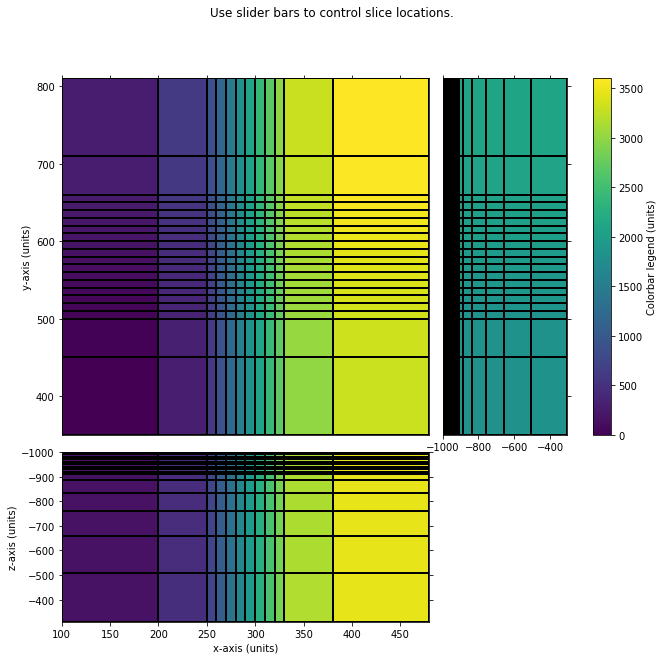

In [17]:
plt.figure(figsize=(10, 10))
wtools.OrthographicSlicer(plt, load, 'spatial', xslice=300)

In [18]:
load.equal(grid), grid.equal(load)

(True, True)